Loads data from the dataset and applies transformntions


In [1]:

import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

from torch.optim.lr_scheduler import ReduceLROnPlateau


batch_size = 32

def load_data():

    data_transforms = {
    'training' : transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),transforms.RandomRotation(30),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                         [0.229, 0.224, 0.225])]),
                                                            
    'validation' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])]),

    'testing' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])
    }

    train_set = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=data_transforms['training'])
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

    test_set = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=data_transforms['testing'])
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

    val_set = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=data_transforms['validation'])
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)                                        
    
    return train_set, test_set, val_set, test_loader, train_loader, val_loader

train_set, test_set, val_set, test_loader, train_loader, val_loader = load_data()


In [95]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

from torch.optim.lr_scheduler import ReduceLROnPlateau


batch_size = 32

def load_data():

    data_transforms = {
    'training' : transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                         [0.229, 0.224, 0.225])]),
                                                            
    'validation' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])]),

    'testing' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])
    }

    train_set = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=data_transforms['training'])
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

    test_set = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=data_transforms['testing'])
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

    val_set = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=data_transforms['validation'])
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)                                        
    
    return train_set, test_set, val_set, test_loader, train_loader, val_loader

train_set, test_set, val_set, test_loader, train_loader, val_loader = load_data()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


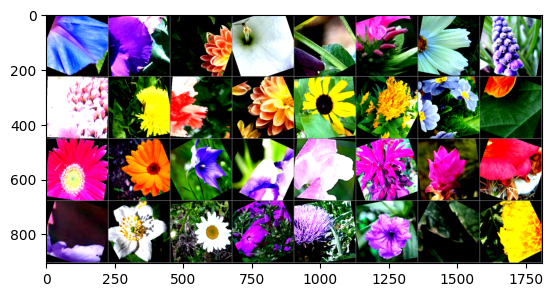

tensor(75)
tensor(44)
tensor(59)
tensor(74)
tensor(39)
tensor(91)
tensor(33)
tensor(24)
tensor(21)
tensor(49)
tensor(30)
tensor(59)
tensor(62)
tensor(26)
tensor(52)
tensor(96)
tensor(40)
tensor(4)
tensor(18)
tensor(8)
tensor(3)
tensor(91)
tensor(38)
tensor(100)
tensor(92)
tensor(68)
tensor(48)
tensor(31)
tensor(28)
tensor(97)
tensor(58)
tensor(46)


In [2]:
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images with iter function
dataiter = iter(train_loader)
images, labels = next(dataiter)

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
for i in range(batch_size):
  print(labels[i])

In [3]:
class Net(nn.Module):
	
    def __init__(self, l1=120, l2=84):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, 5) 
        self.bn2 = nn.BatchNorm2d(32)

        self.fl = nn.Flatten()
        self.fc1 = nn.Linear(32 * 53 * 53, l1)
        self.fc2 = nn.Linear(l1, l2)
        self.fc3 = nn.Linear(l2, 102)

    def forward(self, x):
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        x = self.fl(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=89888, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=102, bias=True)
)


In [4]:
class Net(nn.Module):
	
    def __init__(self, l1=120, l2=84):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, 5) 
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 5) 
        self.bn3 = nn.BatchNorm2d(64)

        self.fl = nn.Flatten()
        self.fc1 = nn.Linear(36864, l1)
        self.fc2 = nn.Linear(l1, l2)
        self.fc3 = nn.Linear(l2, 102)

    def forward(self, x):
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        x = self.pool(self.bn3(F.relu(self.conv3(x))))
        x = self.fl(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=36864, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=102, bias=True)
)


In [19]:
class Net(nn.Module):
	
    def __init__(self, l1=120, l2=84):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, 5) 
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 5) 
        self.bn3 = nn.BatchNorm2d(64)

        self.fl = nn.Flatten()

        self.fc1 = nn.Linear(36864, l1)
        self.fc2 = nn.Linear(l1, l2)
        self.fc3 = nn.Linear(l2, 102)
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        x = self.pool(self.bn3(F.relu(self.conv3(x))))
        x = self.fl(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=102, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [3]:
class Net(nn.Module):
	
    def __init__(self, l1=120, l2=84):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, 5) 
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 5) 
        self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 128, 5) 
        self.bn4 = nn.BatchNorm2d(128)

        self.fl = nn.Flatten()

        self.fc1 = nn.Linear(12800, l1)
        self.fc2 = nn.Linear(l1, l2)
        self.fc3 = nn.Linear(l2, 102)
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        x = self.pool(self.bn3(F.relu(self.conv3(x))))
        x = self.pool(self.bn4(F.relu(self.conv4(x))))
        x = self.fl(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [9]:
def optimLossSched(net, lr, wd):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=wd)
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10)

    return optimizer, criterion, scheduler

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, 'min')

In [5]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [17]:
from torch.autograd import Variable

def train(epoch_num, model):
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    overallIdeal = model
    testIdeal = model
    valIdeal = model
    min_running_loss = 100.0
    min_val_loss = 100.0

    trainingEpoch_loss = []
    validationEpoch_loss = []
    LRatEpoch = []

    for epoch in range(epoch_num):  # loop over the dataset multiple times
        running_loss = 0.0
        model.train()
        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs; data is a list of [inputs, labels]
            images = images.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
            

        valid_loss = 0.0
        model.eval()
        for i, (images, labels) in enumerate(val_loader, 0):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            vloss = criterion(outputs, labels)
            valid_loss = vloss.item()*images.size(0)

        print(f'Epoch {epoch+1} \t\t Training Loss: {running_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')
        print("lr: ", get_lr(optimizer))

        trainingEpoch_loss.append(running_loss / len(train_loader))
        validationEpoch_loss.append(valid_loss / len(val_loader))
        LRatEpoch.append(get_lr(optimizer))
        #accuracy = testAccuracy(model)
        #print("\nepoch: ",epoch,"/",epoch_num," ... Loss: ",loss.item())
        #print('EPOCH:', epoch,'---> TEST ACCURACY: %d %%' % (accuracy))

        # validation dat

        #print("\nepoch: ",epoch,"/",epoch_num," ... Loss: ",loss.item()," VLoss: ", vloss.item())

        scheduler.step(running_loss)

        if running_loss < min_running_loss and valid_loss <= min_val_loss:
            min_running_loss = running_loss
            min_val_loss = valid_loss
            overallIdeal = model
        if running_loss < min_running_loss:
            min_running_loss = running_loss
            testIdeal = model
        elif valid_loss < min_val_loss:
            min_val_loss = valid_loss
            valIdeal = model


    # whatever you are timing goes here
    end.record()

    # Waits for everything to finish running
    torch.cuda.synchronize()
    print(start.elapsed_time(end))  # milliseconds

    return overallIdeal, valIdeal, testIdeal, trainingEpoch_loss, validationEpoch_loss, LRatEpoch



In [7]:
def test(data, model):
    correct = 0
    total = 0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    with torch.no_grad():
        for value in data:
            images, labels = value
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    
    return (100 * correct / total)

In [8]:
def plotLoss(trainingLoss, valLoss, lr):
    from matplotlib import pyplot as plt

    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(min(lr), max(lr))

    for i in range(len(trainingLoss)):
        color = cmap(norm(lr[i]))  # Assign color based on lr value
        plt.plot(trainingLoss[i], label='train_loss', color=color)
        plt.plot(valLoss[i], label='val_loss', color=color)

    plt.legend()
    plt.show

Hyper param tuning:

In [10]:
from sklearn.model_selection import ParameterGrid

hyperparams = {
    'lr': [0.001],
    'l1': [400],
    'l2': [350],
    'wd': [0.1, 0.01, 0.001]
}

param_grid = list(ParameterGrid(hyperparams))

8


In [14]:
if __name__ == "__main__":
    results = []
    num = 0
    for params in param_grid:
        net = Net(l1=params['l1'], l2=params['l2'])

        optimizer, criterion, scheduler = optimLossSched(net, params['lr'], params['wd'])

        ideal, valIdeal, testIdeal, trainingLoss, valLoss, lrEpoch = train(50, net)
        print('Finished Training')
        acc = test(test_loader, net)

        results.append([acc, params['l1'], params['l2'],params['lr'],params['wd']])
        num +=1
        print(num,"/",len(param_grid))

    

The model will be running on cuda:0 device
494201.5
Finished Training
Accuracy of the network on the 10000 test images: 12 %
1 / 3
The model will be running on cuda:0 device
485159.8125
Finished Training
Accuracy of the network on the 10000 test images: 33 %
2 / 3
The model will be running on cuda:0 device
503331.78125
Finished Training
Accuracy of the network on the 10000 test images: 34 %
3 / 3


In [15]:
for i in results:
    print(i)

[12.538624166531143, 400, 350, 0.001, 0.1]
[33.53390795251261, 400, 350, 0.001, 0.01]
[34.54220198406245, 400, 350, 0.001, 0.001]


In [18]:
if __name__ == "__main__":
    torch.cuda.empty_cache()
    net = Net(l1=400, l2=350)

    optimizer, criterion, scheduler = optimLossSched(net, 0.001, 0.01)

    # train the model with epoch number, model
    ideal, valIdeal, testIdeal, trainingLoss, valLoss, lrEpoch = train(220, net)
    print('Finished Training')

    # Accuracy on training data
    #test(train_loader, net)
    #print("--------------")
    # Accuracy on valid data
    #test(val_loader, net)
    #print("--------------") 
    # Accuracy on test data
    #test(test_loader, net)
    

The model will be running on cuda:0 device
Epoch 1 		 Training Loss: 4.622460067272186 		 Validation Loss: 3.953957736492157
lr:  0.001
Epoch 2 		 Training Loss: 4.539266213774681 		 Validation Loss: 3.8641672134399414
lr:  0.001
Epoch 3 		 Training Loss: 4.425603657960892 		 Validation Loss: 3.6981082558631897
lr:  0.001
Epoch 4 		 Training Loss: 4.276975430548191 		 Validation Loss: 3.475289821624756
lr:  0.001
Epoch 5 		 Training Loss: 4.1751382276415825 		 Validation Loss: 3.344373732805252
lr:  0.001
Epoch 6 		 Training Loss: 4.0424610003829 		 Validation Loss: 3.09433776140213
lr:  0.001
Epoch 7 		 Training Loss: 3.927797310054302 		 Validation Loss: 3.0959297120571136
lr:  0.001
Epoch 8 		 Training Loss: 3.8081083446741104 		 Validation Loss: 2.985941380262375
lr:  0.001
Epoch 9 		 Training Loss: 3.6854244098067284 		 Validation Loss: 2.789728820323944
lr:  0.001
Epoch 10 		 Training Loss: 3.672481395304203 		 Validation Loss: 2.841443747282028
lr:  0.001
Epoch 11 		 Training Lo

In [19]:
def plotLoss(trainingLoss, valLoss, lr):
    from matplotlib import pyplot as plt

    lrNew = [(i * 1000) * 2 for i in lr]

    plt.plot(trainingLoss, label='train_loss')
    plt.plot(valLoss, label='val_loss')
    plt.plot(lrNew, label='lr')

    plt.legend()
    plt.show

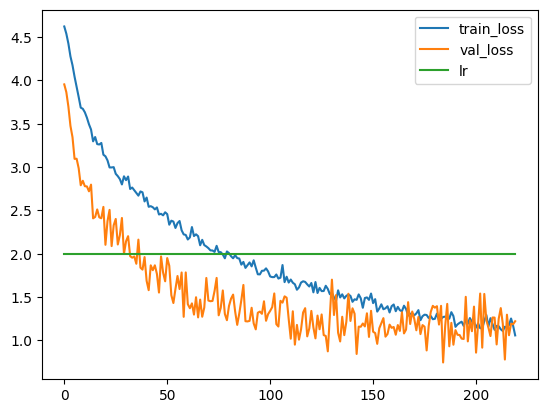

In [20]:
# plot the training loss and validation loss over all epochs
plotLoss(trainingLoss, valLoss, lrEpoch)

In [21]:
# print accuracy on all sets

# Accuracy on training data
print("Training on final: ")
test(train_loader, net)
print("--------------")

# Accuracy on valid data
print("Valid on final: ")
test(val_loader, net)

print("--------------") 
# Accuracy on test data
print("Test on final: ")
test(test_loader, net)



Training on final: 
Accuracy of the network on the 10000 test images: 81 %
--------------
Valid on final: 
Accuracy of the network on the 10000 test images: 54 %
--------------
Test on final: 
Accuracy of the network on the 10000 test images: 50 %


50.88632297934623

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


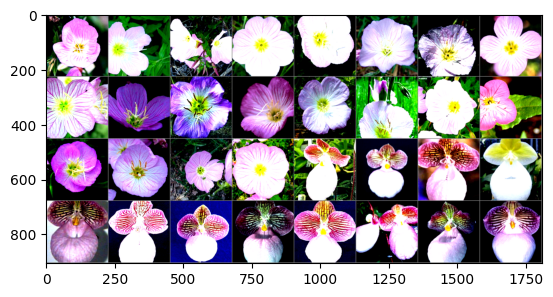

GroundTruth: 
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)


In [19]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ')
for i in range(32):
  print(labels[i])

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
images, labels = images.to(device), labels.to(device)
outputs = net(images)

_, predicted = torch.max(outputs, 1)

for i in range(32):
  print(predicted[i])


tensor(33, device='cuda:0')
tensor(0, device='cuda:0')
tensor(21, device='cuda:0')
tensor(0, device='cuda:0')
tensor(68, device='cuda:0')
tensor(0, device='cuda:0')
tensor(33, device='cuda:0')
tensor(0, device='cuda:0')
tensor(67, device='cuda:0')
tensor(95, device='cuda:0')
tensor(8, device='cuda:0')
tensor(44, device='cuda:0')
tensor(0, device='cuda:0')
tensor(75, device='cuda:0')
tensor(0, device='cuda:0')
tensor(98, device='cuda:0')
tensor(51, device='cuda:0')
tensor(0, device='cuda:0')
tensor(77, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(67, device='cuda:0')
tensor(1, device='cuda:0')
tensor(12, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')


In [ ]:
correct = 0
total = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")
# Convert model parameters and buffers to CPU or Cuda
net.to(device)

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

The model will be running on cuda:0 device
Accuracy of the network on the 10000 test images: 31 %
